In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
data=pd.read_csv('/kaggle/input/titanic/train.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

**Visualizing the Data**
I used the amazing data rep by https://www.kaggle.com/code/hardikarora24/titanic0




<Axes: ylabel='Survived'>

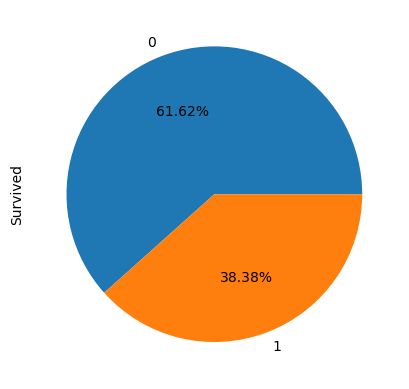

In [3]:
training.Survived.value_counts().plot.pie(autopct='%1.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

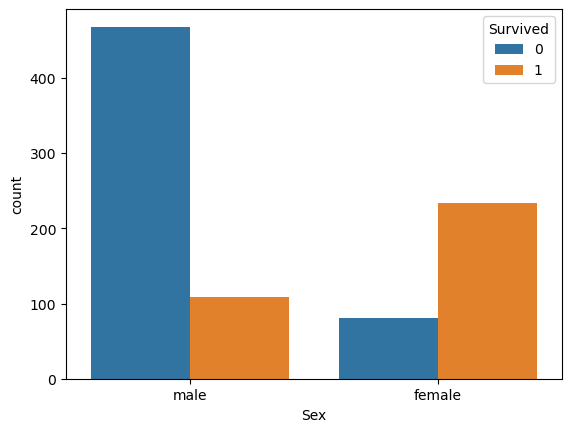

In [4]:
sb.countplot(training, x = 'Sex', hue = 'Survived')

<Axes: xlabel='Embarked', ylabel='count'>

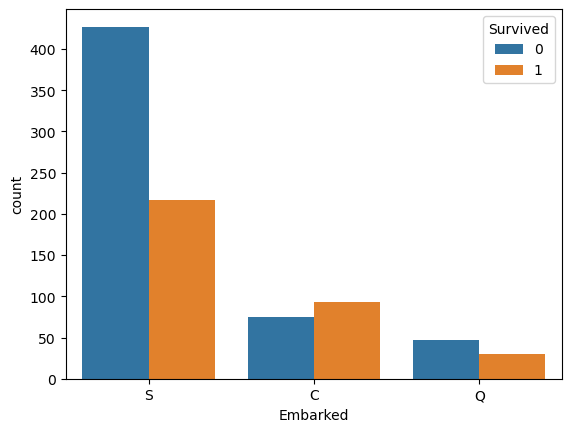

In [5]:
sb.countplot(training, x = 'Embarked', hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

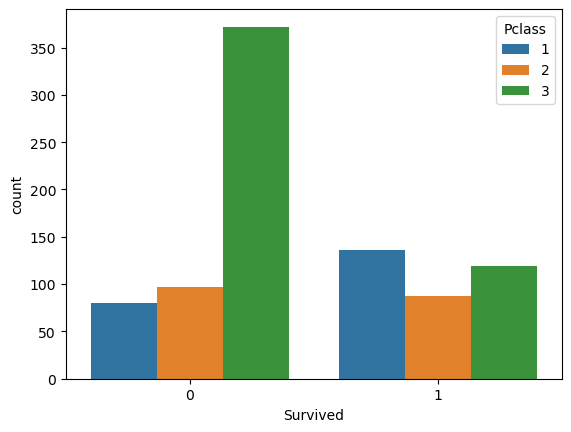

In [6]:
sb.countplot(training, x = 'Survived', hue = 'Pclass')

In [7]:
pd.crosstab(training.Pclass,training.Survived,margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Parch', ylabel='count'>

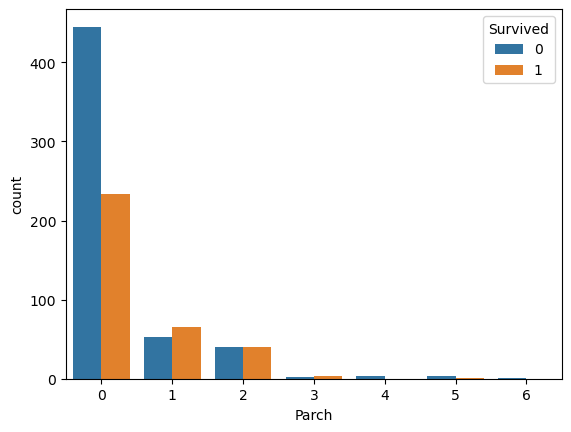

In [8]:
sb.countplot(training, x = 'Parch', hue = 'Survived')

<Axes: xlabel='SibSp', ylabel='count'>

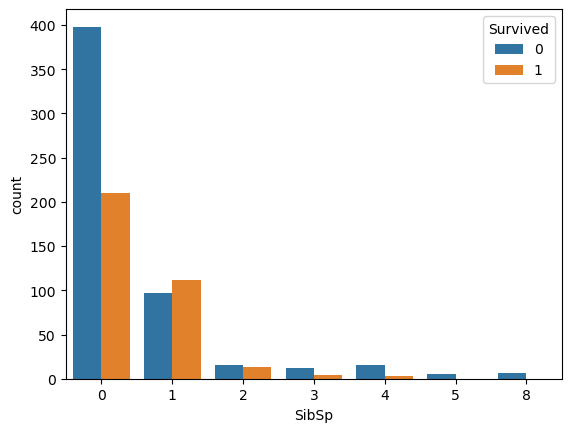

In [9]:
sb.countplot(training, x = 'SibSp', hue = 'Survived')

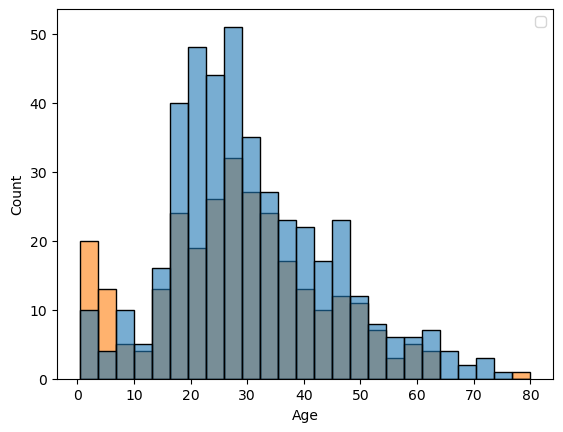

In [10]:
sb.histplot(training, x='Age', hue='Survived', alpha=0.6, bins=25)
plt.legend()
plt.show()

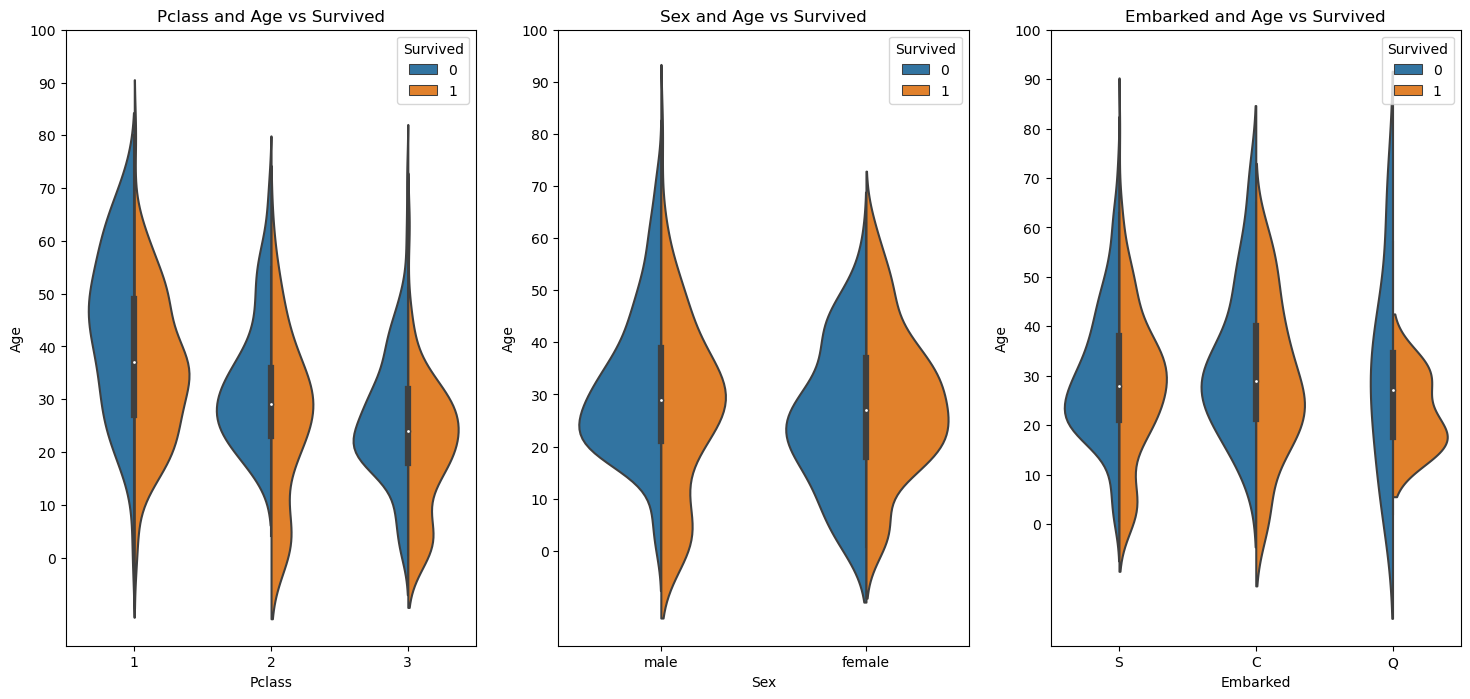

In [11]:
f,ax=plt.subplots(1,3,figsize=(18,8))
sb.violinplot(x="Pclass",y="Age", hue="Survived", data=training,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot(x="Sex",y="Age", hue="Survived", data=training,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
sb.violinplot(x="Embarked",y="Age", hue="Survived", data=training,split=True,ax=ax[2])
ax[2].set_title('Embarked and Age vs Survived')
ax[2].set_yticks(range(0,110,10))
plt.show()

In [12]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [13]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [14]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


<Axes: xlabel='Sex'>

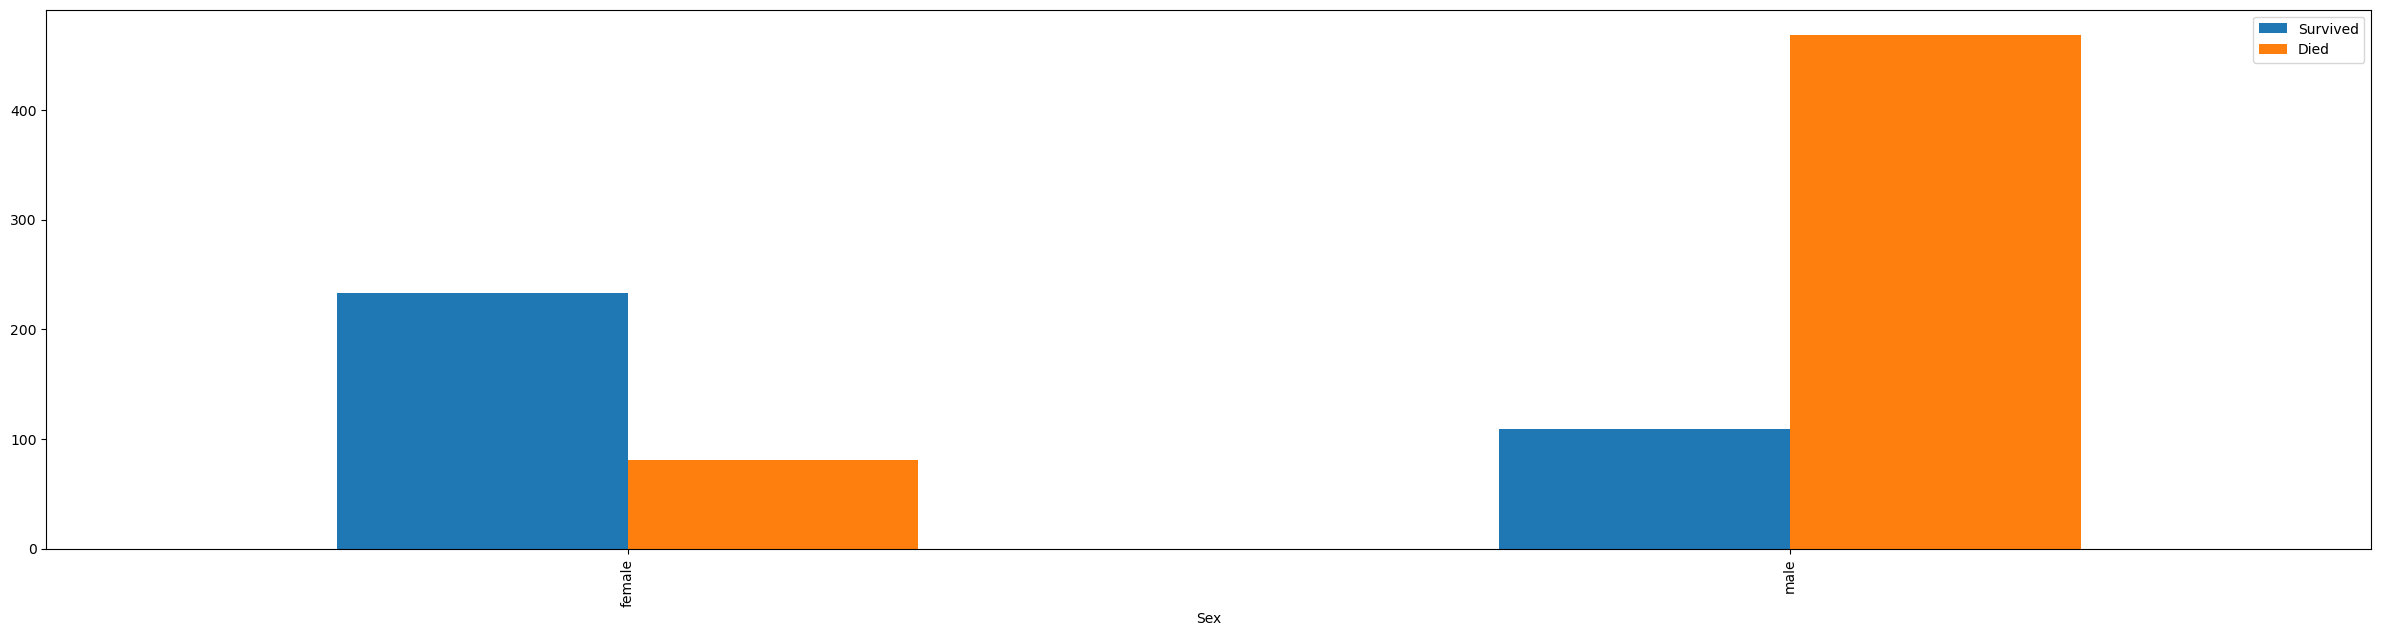

In [15]:
training['Died']=1- training['Survived']
training.groupby('Sex')[['Survived','Died']].sum().plot(kind='bar',figsize=(30, 7))

**Project Planning:**

For successfull Machine Learning, Data processing is a vital part of the project. Giving the model good data to work with will be the first major step.
Firstly, cleaning up the data and then doing some feature engineering


Firstly let's look at possible categories to lump together
(I lost my progess of my first day of work due to Kaggle not saving my notebook, hence I will recap what I did but not go into as much detail)


In [16]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print('---------------------------------')
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('---------------------------------')
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
training['CabinComb'] = training.Cabin.apply(lambda x: str(x)[0])
print('---------------------------------')
print(training.CabinComb.value_counts())
pd.pivot_table(training,index='Survived',columns='CabinComb', values = 'Name', aggfunc='count')
print('---------------------------------')

i = 0
j = 0
train = training.sort_values(by='Cabin')
while i <= 195:
    j = i
    i += 15
    train['Cabin' + str(i)] = train['Cabin'].iloc[j:i]
    print(pd.pivot_table(train,index='Survived',columns='Cabin' + str(i), values = 'Name', aggfunc='count'))
    print('---------------------------------')


def extract_cabin_num(cabin):
    if isinstance(cabin, str):
        cabin_num = cabin.split()[0][1:]  
        if cabin_num.isdigit():
            return int(cabin_num)
    return None

def categorize_cabin_smaller_33(cabin_num):
    if cabin_num is not None and cabin_num < 33:
        return 'Yes'
    return 'No'

def categorize_cabin_33_66(cabin_num):
    if cabin_num is not None and 33 <= cabin_num <= 66:
        return 'Yes'
    return 'No'

def categorize_cabin_bigger_66(cabin_num):
    if cabin_num is not None and cabin_num > 66:
        return 'Yes'
    return 'No'

training['CabinNum'] = training['Cabin'].map(extract_cabin_num)

training['Cabin_0_33'] = training['CabinNum'].map(categorize_cabin_smaller_33)
training['Cabin_33_66'] = training['CabinNum'].map(categorize_cabin_33_66)
training['Cabin_66'] = training['CabinNum'].map(categorize_cabin_bigger_66)


print(pd.pivot_table(training,index='Survived',columns='Cabin_0_33', values = 'Name', aggfunc='count'))
print('---------------------------------')
print(pd.pivot_table(training,index='Survived',columns='Cabin_33_66', values = 'Name', aggfunc='count'))
print('---------------------------------')
print(pd.pivot_table(training,index='Survived',columns='Cabin_66', values = 'Name', aggfunc='count'))
print('---------------------------------')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
---------------------------------
Sex       female  male
Survived              
0             81   468
1            233   109
---------------------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
---------------------------------
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinComb, dtype: int64
---------------------------------
Cabin15   A10  A14  A16  A19  A20  A23  A24  A26  A31  A32  A34  A36   A5  \
Survived                                                                    
0         1.0  1.0  NaN  1.0  NaN  NaN  1.0  NaN  NaN  1.0  NaN  1.0  1.0   
1         NaN  NaN  1.0  NaN  1.0  1.0  NaN  1.0  1.0  NaN  1.0  NaN  NaN   

Cabin15    A6   A7  
Survived            
0         NaN  1.0  
1         1.0  NaN  
---------------------------------
Cabin30   B101  B102  B18  B19  B20  B22  B28   B3  B3

Now let's look for some notable trends in the rooms by number


Text(0.5, 1.0, 'Sex and Age vs Survived')

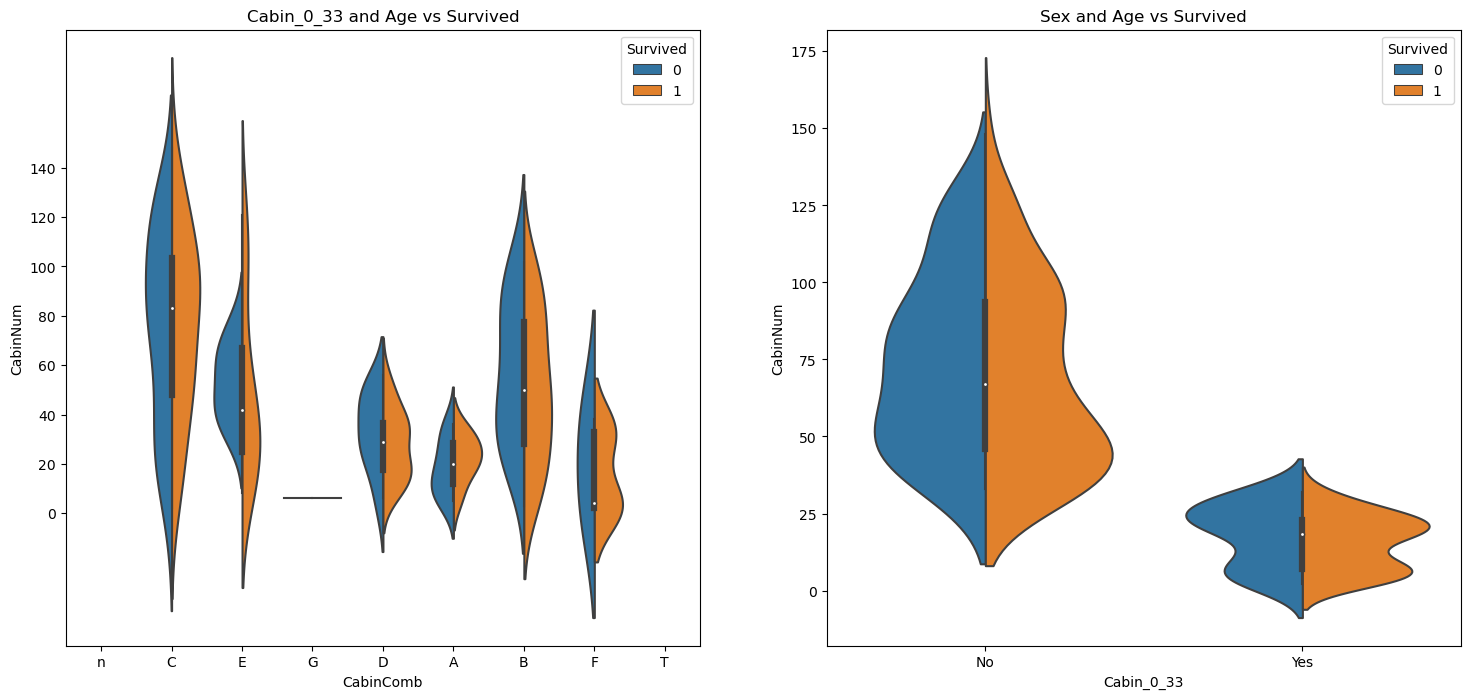

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot(x="CabinComb",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[0])
ax[0].set_title('Cabin_0_33 and Age vs Survived')
ax[0].set_yticks(range(0,150,20))

sb.violinplot(x="Cabin_0_33",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
#ax[1].set_yticks(range(0,110,10))

Text(0.5, 1.0, 'Sex and Age vs Survived')

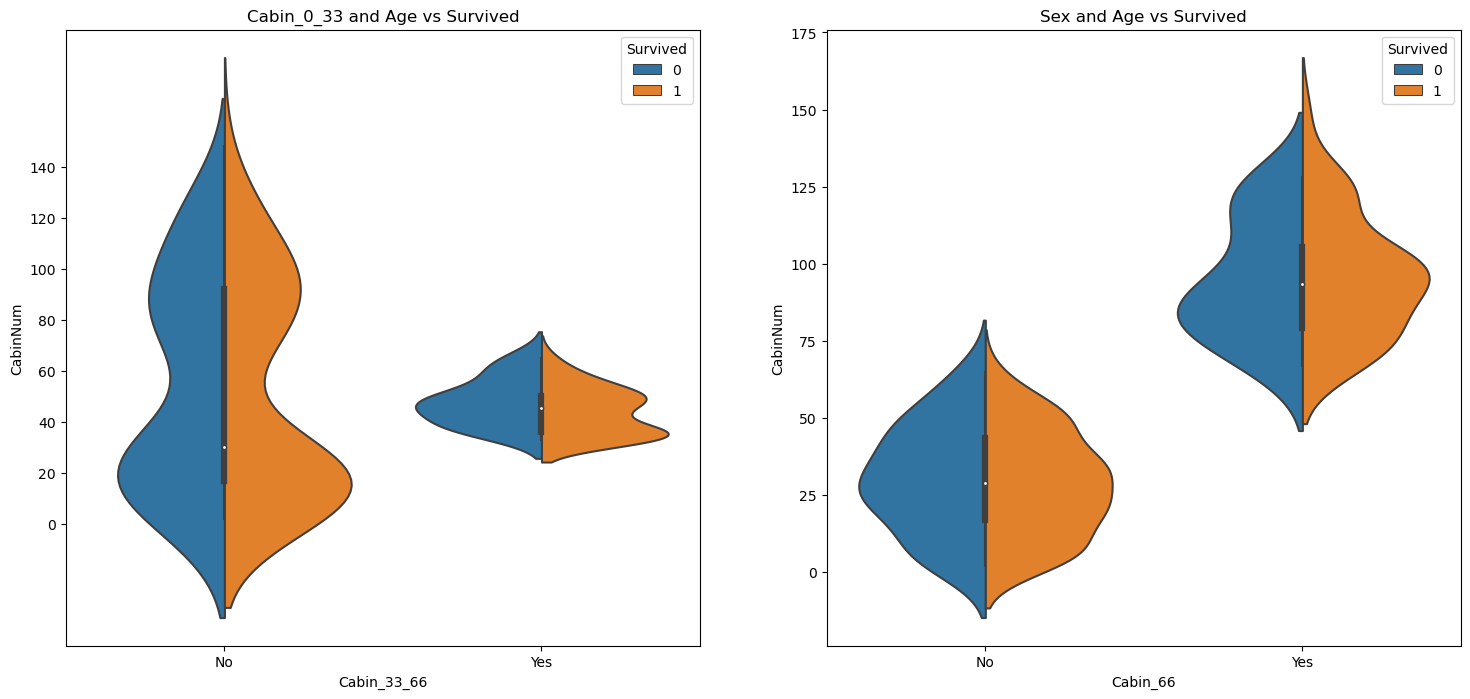

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot(x="Cabin_33_66",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[0])
ax[0].set_title('Cabin_0_33 and Age vs Survived')
ax[0].set_yticks(range(0,150,20))

sb.violinplot(x="Cabin_66",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
#ax[1].set_yticks(range(0,110,10))

In [19]:
'''def extract_cabin_char(cabin):
    if isinstance(cabin, str):
        cabin_char = cabin[0]
        if cabin_char.isstring():
            return str(cabin_char)
    return None

def extract_danger_zone_E(cabin):
    if cabin_char == 'E':
        if cabin_num is not None and cabin_num > 40:
            if cabin_num < 80:
                return 'Yes'
    return 'No' '''
    
#training['cabin_char'] = training['Cabin'].map(extract_cabin_char)
#training['Danger_Zone_E'] = training['Cabin'].map(extract_danger_zone_E)

"def extract_cabin_char(cabin):\n    if isinstance(cabin, str):\n        cabin_char = cabin[0]\n        if cabin_char.isstring():\n            return str(cabin_char)\n    return None\n\ndef extract_danger_zone_E(cabin):\n    if cabin_char == 'E':\n        if cabin_num is not None and cabin_num > 40:\n            if cabin_num < 80:\n                return 'Yes'\n    return 'No' "

Cabins sharing a letter can be combined as they share similar postions on the ship like a level. Further I tried finding a conncection between the numbers. For example if having a low number (like < 33 as an arbitrary example I picked) would represent being closer to an exit and thus maybe a lifeboat was an indication of survival.
It turns out, cabin numbers between E25 and E75 had a particularly low chance of survival.

In [20]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
training['numeric_ticket'].value_counts()
training['ticket_letters'].value_counts()
print(pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count'))
print(pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count'))

numeric_ticket    0    1
Survived                
0               142  407
1                88  254
ticket_letters      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                  ...   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

ticket_letters  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                       
0               5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1               1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0  

[2 rows x 29 columns]


I also thought the tickets having a number or not would give some information, like being the cabins of special passengers who may have a particularly good/bad postion on the ship. Because of losing my code I used https://www.kaggle.com/code/kenjee/titanic-project-example 's lambda function for the ticket letters.
I wasn't sure however if I could combine certain special ticket types so I decided against it for the moment.


Next I was interested in weather the titles of the passengers would make a difference, like "nobles" being put together if they all died or suvived no matter their individual title or women being put together. 

It turns out that 'nobles' (men and women) actually had a survival rate higher their non-noble counterparts, especially for men.

For women, their marital status plays a role int their survival rate. Unmarried women (Miss, Mlle, Mme) having a lower surival rate than married ones (Mrs) so I decided to combine them based on that.  

In [21]:
training['title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['title'].value_counts()


print(pd.pivot_table(training,index='Survived',columns='title', values = 'Ticket', aggfunc='count'))

#training['unmarried_women'] = training['Miss'].combine_first(training['Mlle'])
#training['married_women'] = 

title     Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                    
0          1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1          NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

title     Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                 
0         NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1         1.0   81.0  99.0  1.0  NaN  1.0           1.0  


In [22]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,train_test,Died,CabinComb,CabinNum,Cabin_0_33,Cabin_33_66,Cabin_66,numeric_ticket,ticket_letters,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,1,n,NaN,No,No,No,0,a5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,C,85.0,No,No,Yes,0,pc,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,n,NaN,No,No,No,0,stono2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,C,123.0,No,No,Yes,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,n,NaN,No,No,No,1,0,Mr


In [23]:
training['title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,train_test,Died,CabinComb,CabinNum,Cabin_0_33,Cabin_33_66,Cabin_66,numeric_ticket,ticket_letters,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,1,n,NaN,No,No,No,0,a5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,C,85.0,No,No,Yes,0,pc,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,n,NaN,No,No,No,0,stono2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,C,123.0,No,No,Yes,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,n,NaN,No,No,No,1,0,Mr


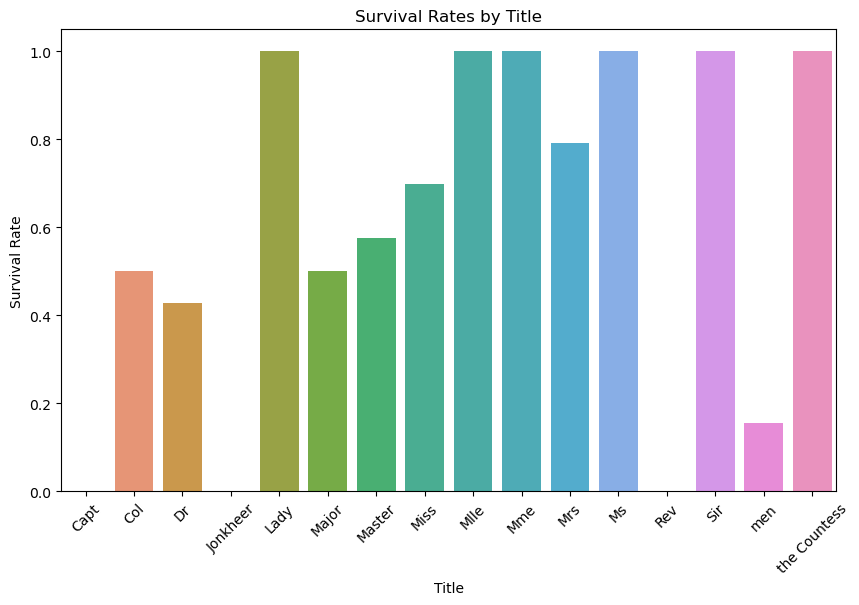

In [24]:

#training['Miss'] = training['title'].apply(lambda x: 'Yes' if x == 'Miss' else 'No')
#training['Mlle'] = training['title'].apply(lambda x: 'Yes' if x == 'Mlle' else 'No')
title_dummies = pd.get_dummies(training['title'])

training_dummies = pd.concat([training, title_dummies], axis=1)
#training['unmarried_women'] = training['Miss'].combine_first(training['Mlle'])
#training['unmarried_women'] = training['title'].apply(lambda x: 'unmarried_women' if x in ['Miss', 'Mlle'] else 'No')
training['title'] = training_dummies['title'].replace(['Miss', 'Mlle'], 'unmarried_women')
training['title'] = training_dummies['title'].replace(['Mme', 'Mrs'], 'married_women')
training['title'] = training_dummies['title'].replace(['Master', 'Col', 'Sir', 'Major', 'Jonkheer'], 'noblemen')
training['title'] = training_dummies['title'].replace(['the Countess', 'Lady'], 'noblewomen')
training['title'] = training_dummies['title'].replace(['Mr', 'Don'], 'men')
survival_rates = training.groupby('title')['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Plot the survival rates using Seaborn
sb.barplot(data=survival_rates, x='title', y='Survived')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Title')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#training['unmarried_women'].value_counts()

In [25]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,train_test,Died,CabinComb,CabinNum,Cabin_0_33,Cabin_33_66,Cabin_66,numeric_ticket,ticket_letters,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,1,n,NaN,No,No,No,0,a5,men
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,C,85.0,No,No,Yes,0,pc,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,n,NaN,No,No,No,0,stono2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,C,123.0,No,No,Yes,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,n,NaN,No,No,No,1,0,men


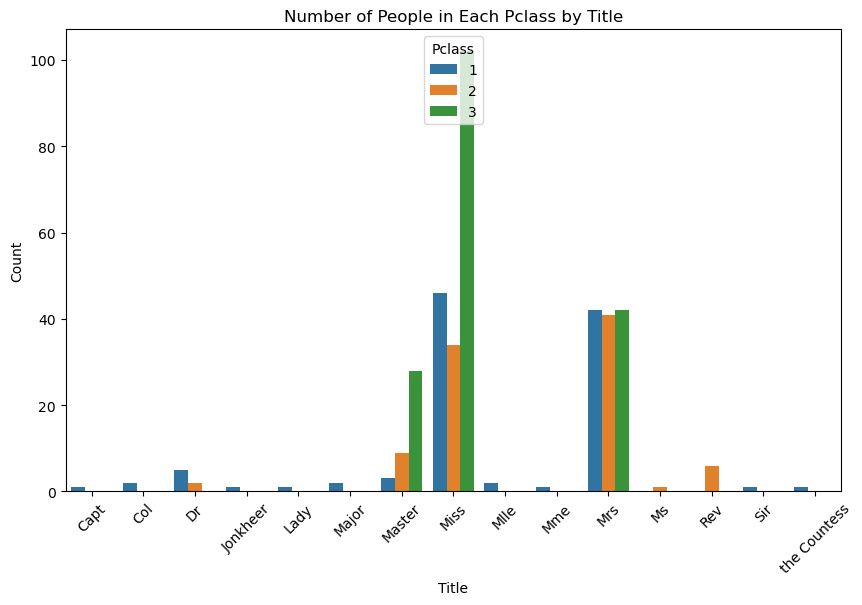

In [26]:
excluded_title = 'men'
filtered_data = training[training['title'] != excluded_title]
title_pclass_counts = filtered_data.groupby(['title', 'Pclass']).size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(10, 6))
sb.barplot(data=title_pclass_counts, x='title', y='Count', hue='Pclass')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Number of People in Each Pclass by Title')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Pclass')
plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

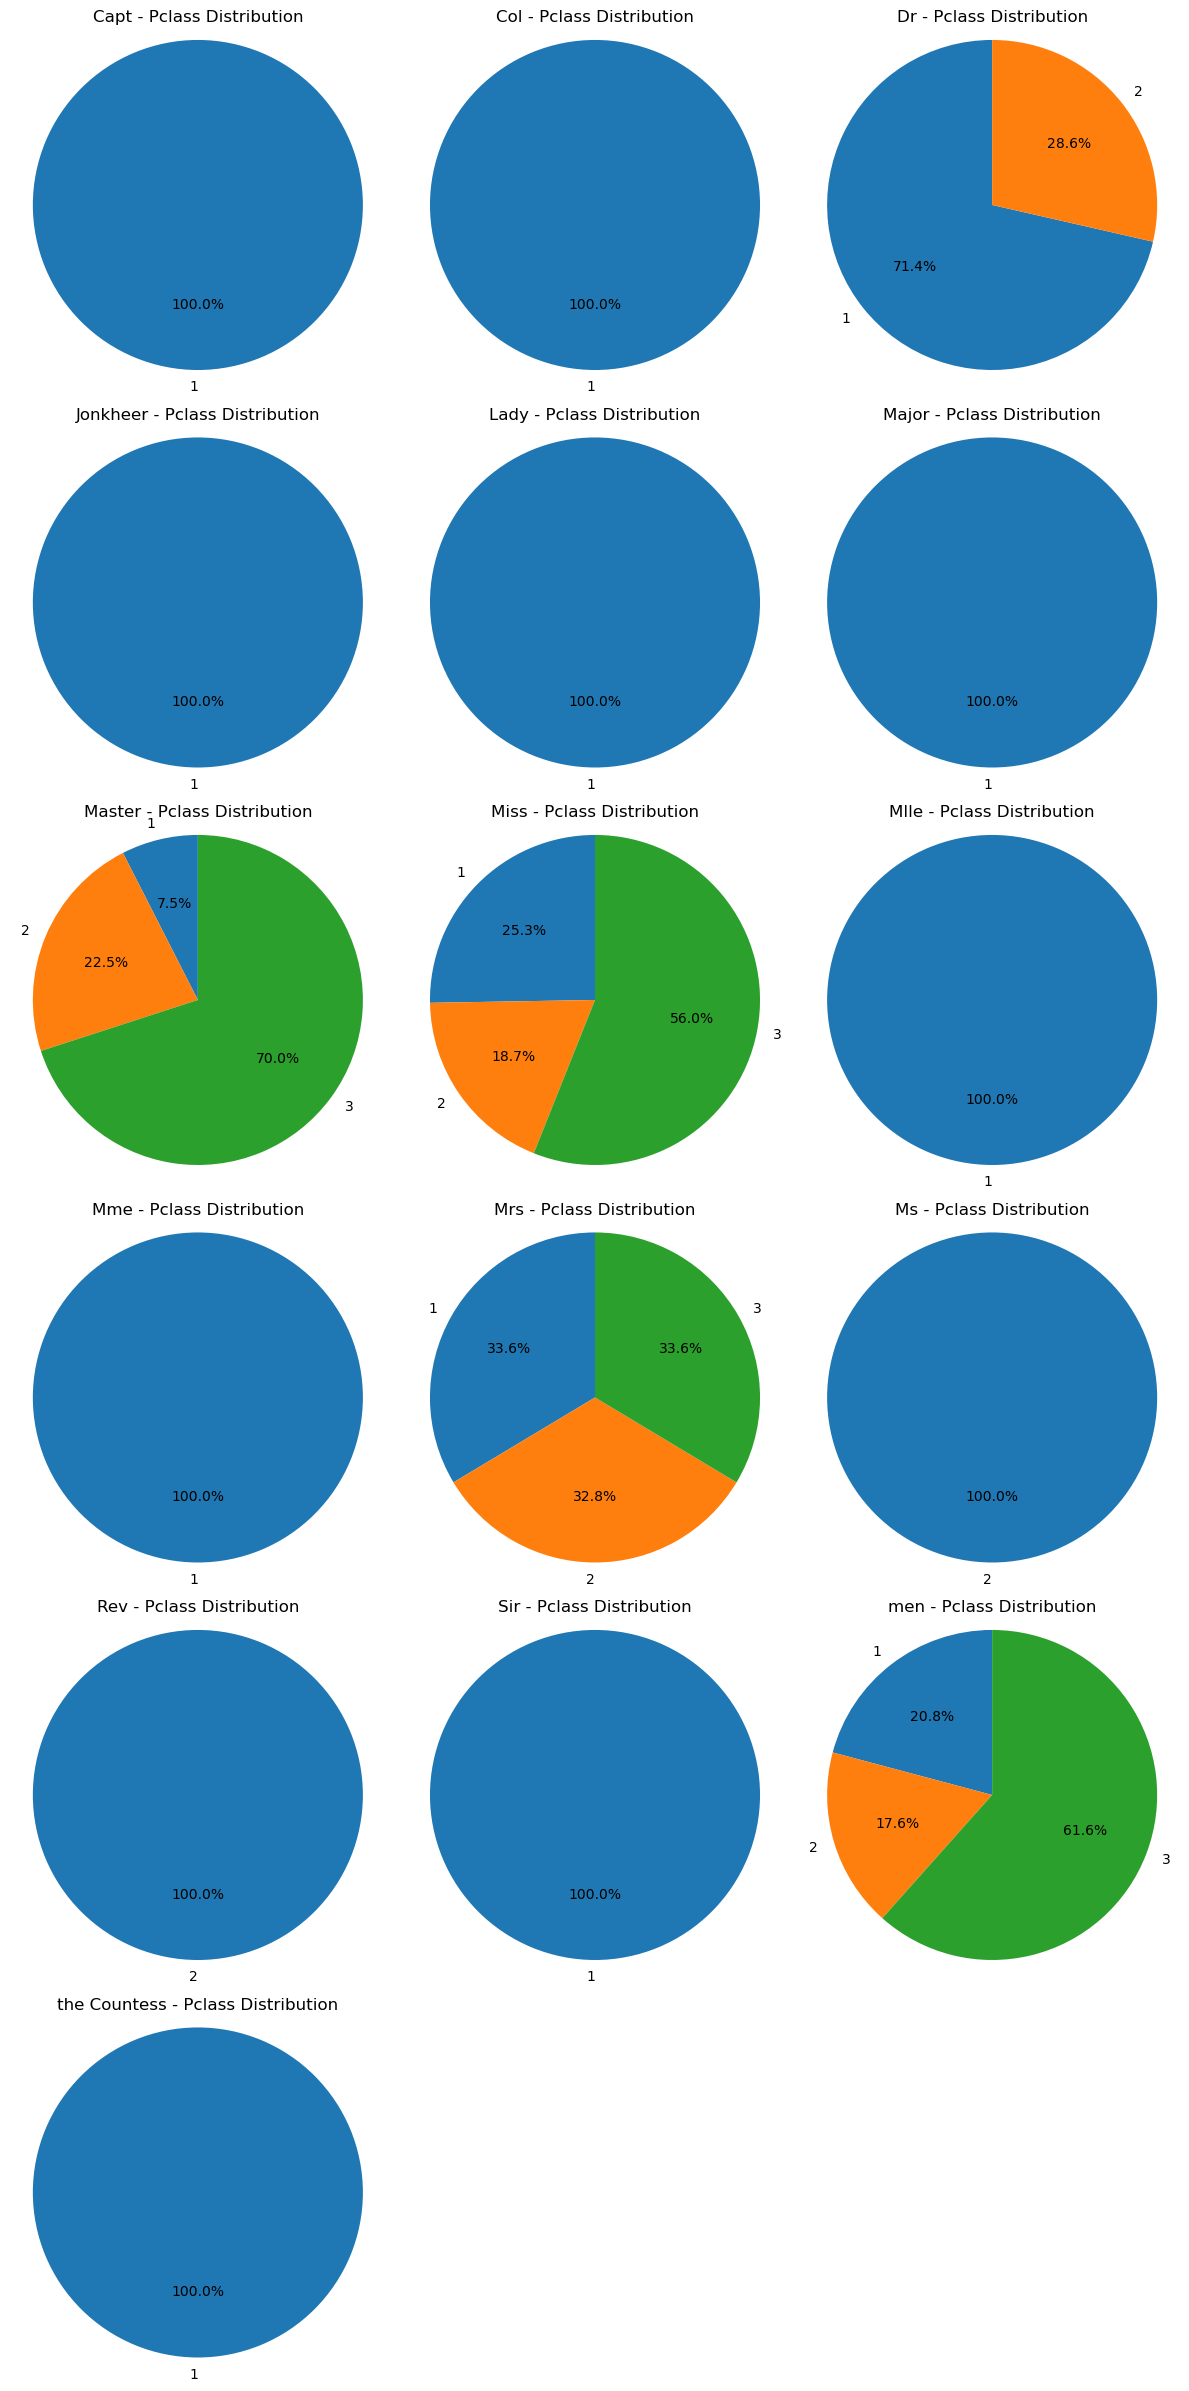

In [27]:
import math
title_pclass_counts = filtered_data.groupby(['title', 'Pclass']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))

# Get the unique titles
titles = title_pclass_counts['title'].unique()

# Count the number of people in each title-Pclass combination
title_pclass_counts = training.groupby(['title', 'Pclass']).size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(12, 8))

# Get the unique titles
titles = title_pclass_counts['title'].unique()

num_titles = len(titles)
num_cols = 3
num_rows = math.ceil(num_titles / num_cols)

# Set the figure size
plt.figure(figsize=(12, 4 * num_rows))

# Create a pie chart for each title
for i, title in enumerate(titles):
    data = title_pclass_counts[title_pclass_counts['title'] == title]
    sizes = data['Count']
    labels = data['Pclass']

    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'{title} - Pclass Distribution')

plt.tight_layout()
plt.show()

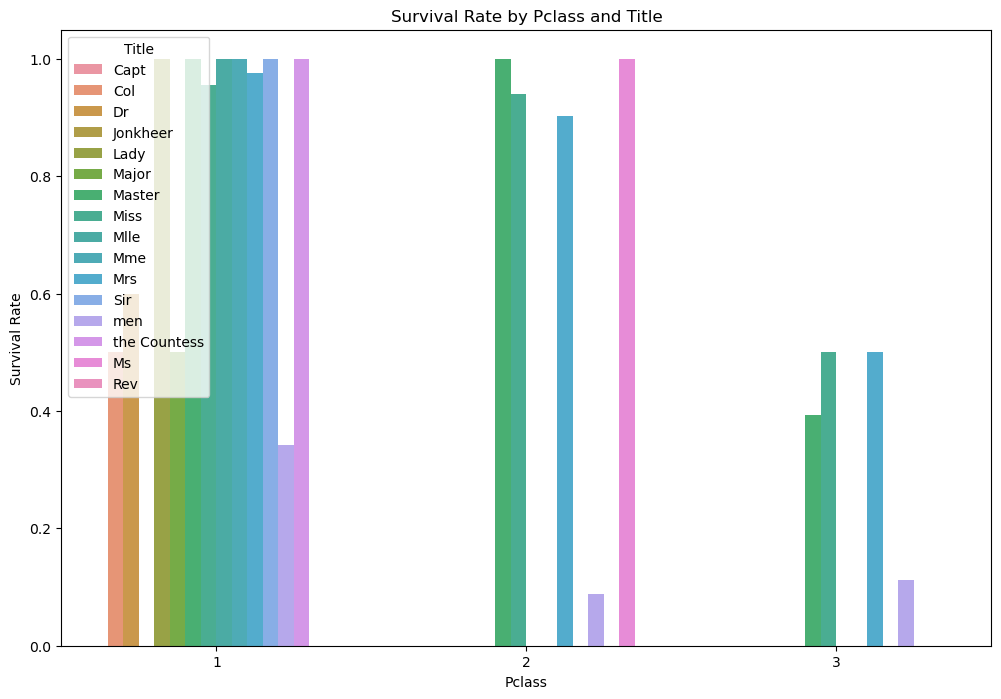

In [28]:
survival_rate = training.groupby(['Pclass', 'title']).Survived.mean().reset_index()
plt.figure(figsize=(12, 8))

# Create a stacked bar chart
sb.barplot(data=survival_rate, x='Pclass', y='Survived', hue='title')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass and Title')

plt.legend(title='Title', loc='best')
plt.show()

/tmp/ipykernel_20/3490336325.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_see.corr()


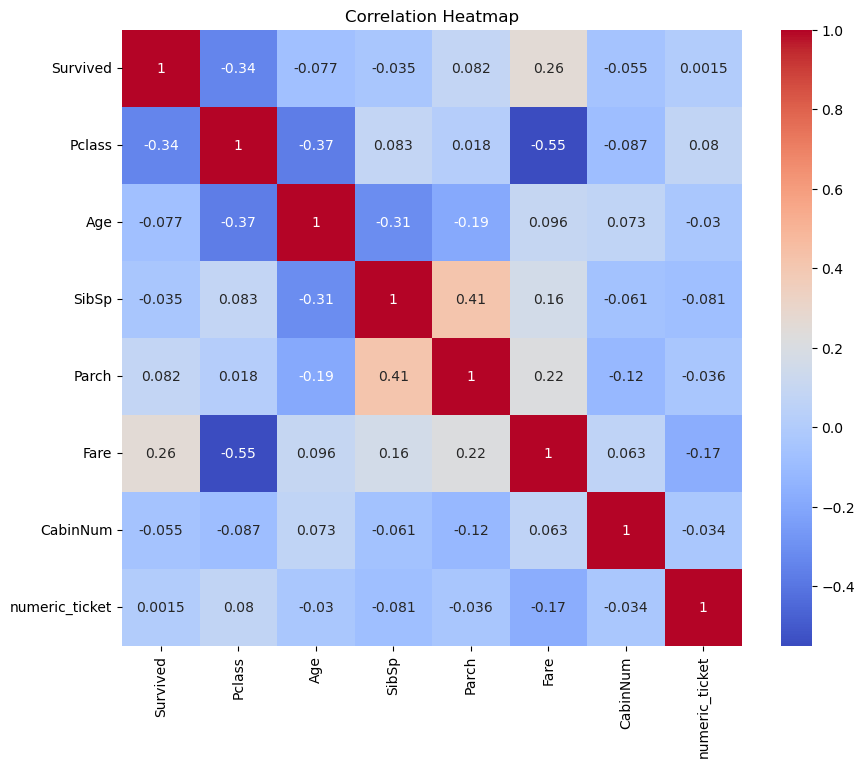

In [29]:
k = pd.read_csv('/kaggle/input/titanic/train.csv')
train_see = k
train_see['CabinNum'] = train_see['Cabin'].map(extract_cabin_num)
train_see['numeric_ticket'] = train_see.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_see['ticket_letters'] = train_see.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
train_see.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
corr_matrix = train_see.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

**Feature Engineering**


In [30]:
test['CabinNum'] = test['Cabin'].map(extract_cabin_num)
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
test['title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
title_dummies = pd.get_dummies(test['title'])
test_dummies = pd.concat([training, title_dummies], axis=1)
test['title'] = test_dummies['title'].replace(['Miss', 'Mlle'], 'unmarried_women')
test['title'] = test_dummies['title'].replace(['Mme', 'Mrs'], 'married_women')
test['title'] = test_dummies['title'].replace(['Master', 'Col', 'Sir', 'Major', 'Jonkheer'], 'noblemen')
test['title'] = test_dummies['title'].replace(['the Countess', 'Lady'], 'noblewomen')
test['title'] = test_dummies['title'].replace(['Mr', 'Don'], 'men')

In [31]:
#data.head()

In [32]:
from sklearn.model_selection import train_test_split

X = training.drop('Survived', axis = 1)
#X = data
Y = training['Survived']
#Y = data

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_training[['Age']] = scaler.fit_transform(X_training[['Age']])
X_test[['Age']] = scaler.fit_transform(X_test[['Age']])

X_training[['Fare']] = scaler.fit_transform(X_training[['Fare']])
X_test[['Fare']] = scaler.fit_transform(X_test[['Fare']])

X_training[['Pclass']] = scaler.fit_transform(X_training[['Pclass']])
X_test[['Pclass']] = scaler.fit_transform(X_test[['Pclass']])

X_training[['SibSp']] = scaler.fit_transform(X_training[['SibSp']])
X_test[['SibSp']] = scaler.fit_transform(X_test[['SibSp']])

X_training[['Parch']] = scaler.fit_transform(X_training[['Parch']])
X_test[['Parch']] = scaler.fit_transform(X_test[['Parch']])

X_test.drop(['Sex', 'Fare'], axis = 1, inplace = True)
#X_test.drop('Sex_male', axis = 1, inplace = True)

X_test.head(5)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Cabin,Embarked,train_test,Died,CabinComb,CabinNum,Cabin_0_33,Cabin_33_66,Cabin_66,numeric_ticket,ticket_letters,title
709,710,1.0,"Moubarek, Master. Halim Gonios (""William George"")",NaN,0.25,0.2,2661,NaN,C,1,0,n,NaN,No,No,No,1,0,Master
439,440,0.5,"Kvillner, Mr. Johan Henrik Johannesson",0.429956,0.00,0.0,C.A. 18723,NaN,S,1,1,n,NaN,No,No,No,0,ca,men
840,841,1.0,"Alhomaki, Mr. Ilmari Rudolf",0.273194,0.00,0.0,SOTON/O2 3101287,NaN,S,1,1,n,NaN,No,No,No,0,sotono2,men
720,721,0.5,"Harper, Miss. Annie Jessie ""Nina""",0.073678,0.00,0.2,248727,NaN,S,1,0,n,NaN,No,No,No,1,0,Miss
39,40,1.0,"Nicola-Yarred, Miss. Jamila",0.187687,0.25,0.0,2651,NaN,C,1,0,n,NaN,No,No,No,1,0,Miss


In [33]:
'''from sklearn.model_selection import train_test_split

X = training.drop('Survived', axis = 1)
Y = training['Survived']
X = training.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Parch'], axis = 1, inplace = True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)'''

"from sklearn.model_selection import train_test_split\n\nX = training.drop('Survived', axis = 1)\nY = training['Survived']\nX = training.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Parch'], axis = 1, inplace = True)\n\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)\n\nfrom sklearn.ensemble import RandomForestClassifier\n\nrf = RandomForestClassifier()\nrf.fit(X_train, Y_train)"